# Customer Personality Analysis

# Problem statement

This Exploratory Data Analysis (EDA) project aims to understand customer personality traits and behaviours using a 'Customer Personality Analysis' dataset. By examining attributes such as age distribution, relationship status, educational attainment, income insights and spending habits, the aim is to gain insights that could be useful to a company looking to adapt and tailor its products to the specific needs, behaviours and concerns of different customer segments. The analysis carried out includes visualisations of the above attributes with the aim of uncovering patterns and trends among customers that could potentially inform targeted marketing strategies and product modifications.

# About the Dataset:



**Context**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### People

* **ID:** Customer's unique identifier
* **Year_Birth:** Customer's birth year
* **Education:** Customer's education level
* **Marital_Status:** Customer's marital status
* **Income:** Customer's yearly household income
* **Kidhome:** Number of children in customer's household
* **Teenhome:** Number of teenagers in customer's household
* **Dt_Customer:** Date of customer's enrollment with the company
* **Recency:** Number of days since customer's last purchase
* **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

### Products

* **MntWines:** Amount spent on wine in last 2 years
* **MntFruits:** Amount spent on fruits in last 2 years
* **MntMeatProducts:** Amount spent on meat in last 2 years
* **MntFishProducts:** Amount spent on fish in last 2 years
* **MntSweetProducts:** Amount spent on sweets in last 2 years
* **MntGoldProds:** Amount spent on gold in last 2 years

### Promotion

* **NumDealsPurchases:** Number of purchases made with a discount
* **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

* **NumWebPurchases:** Number of purchases made through the company’s website
* **NumCatalogPurchases:** Number of purchases made using a catalogue
* **NumStorePurchases:** Number of purchases made directly in stores
* **NumWebVisitsMonth:** Number of visits to company’s website in the last month

# Step 0: Imports and Reading Data

In [1]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')
pd.set_option("display.max_columns", 30)

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Step 1: Data Understanding

In [3]:
df.shape

(2240, 29)

In [4]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [5]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
df.describe().style.background_gradient(cmap='Greys')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


# Step 2: Data Preparation

- Changing column format
- Renaming columns
- Adding new columns
- Identifying null values and duplicate rows
- Filling null values
- Check for anomalies in the dataset

In [8]:
# The "Dt_Customer" column is an object column, but it's a date, so let's change its type so we can get the time period of our data correctly.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=False, yearfirst=True)

/var/folders/m1/bq9svjs92qbb8xnbql63nj3c0000gn/T/ipykernel_1368/1884366241.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=False, yearfirst=True)


In [9]:
# Rename our date column
df = df.rename(columns={'Dt_Customer' : 'Date_Customer'})

In [10]:
# Let's have a look what is the time period of the data we have?
df['Date_Customer'].min(), df['Date_Customer'].max()

(Timestamp('2012-01-08 00:00:00'), Timestamp('2014-12-06 00:00:00'))

---
We have the columns 'Education' and 'Marital_Status' as object format, let's look at the number of unique categories in these columns.

Firstly let's look at education one:

In [11]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [12]:
# The 'Graduation' category can refer to both undergraduate and postgraduate 
# But let's say it refers to people who have a bachelor's degree

df['Education'] = df['Education'].replace(['PhD', 'Master','2n Cycle'], 'Postgraduate')  
df['Education'] = df['Education'].replace(['Graduation'], 'Undergraduate')
df['Education'].value_counts()

Undergraduate    1127
Postgraduate     1059
Basic              54
Name: Education, dtype: int64

Now let's look at the marital status column:

In [13]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [14]:
# There are some strange values, so let's split this column into two categories:
# People who are in a relationship as a 'Relationship'
# People who are not in a relationship as 'Single'

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [15]:
# Let's add a new column 'Children', where we sum up the number of children and the number of teenagers at home. 
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64

In [16]:
# Let's also add a column called 'Total_expenses':
df['Total_expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_expenses, Length: 2240, dtype: int64

In [17]:
# Let's also add 'Age' column
df['Age'] = 2014 - df['Year_Birth']

In [18]:
# Now let's change some of the column names to make them clearer
df = df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
df = df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Marital_Status     2240 non-null   object        
 4   Income             2216 non-null   float64       
 5   Kidhome            2240 non-null   int64         
 6   Teenhome           2240 non-null   int64         
 7   Date_Customer      2240 non-null   datetime64[ns]
 8   Recency            2240 non-null   int64         
 9   Wines              2240 non-null   int64         
 10  Fruits             2240 non-null   int64         
 11  Meat               2240 non-null   int64         
 12  Fish               2240 non-null   int64         
 13  Sweets             2240 non-null   int64         
 14  Gold    

In [19]:
# Let's check if there are any values missing
df.isna().sum()

ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
Date_Customer         0
Recency               0
Wines                 0
Fruits                0
Meat                  0
Fish                  0
Sweets                0
Gold                  0
NumDealsPurchases     0
Web                   0
Catalog               0
Store                 0
NumWebVisitsMonth     0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
AcceptedCmp1          0
AcceptedCmp2          0
Complain              0
Z_CostContact         0
Z_Revenue             0
Response              0
Children              0
Total_expenses        0
Age                   0
dtype: int64

In [20]:
# There is only one column 'Income' that has missing values, let's see them
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Catalog,Store,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_expenses,Age
10,1994,1983,Undergraduate,Relationship,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,...,0,2,7,0,0,0,0,0,0,3,11,0,1,19,31
27,5255,1986,Undergraduate,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,...,0,0,1,0,0,0,0,0,0,3,11,0,1,637,28
43,7281,1959,Postgraduate,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,...,3,4,2,0,0,0,0,0,0,3,11,0,0,186,55
48,7244,1951,Undergraduate,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,...,1,4,6,0,0,0,0,0,0,3,11,0,3,124,63
58,8557,1982,Undergraduate,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,...,0,3,6,0,0,0,0,0,0,3,11,0,1,46,32
71,10629,1973,Postgraduate,Relationship,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,...,0,3,8,0,0,0,0,0,0,3,11,0,1,109,41
90,8996,1957,Postgraduate,Relationship,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,...,2,8,9,0,0,0,0,0,0,3,11,0,3,603,57
91,9235,1957,Undergraduate,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,...,0,2,7,0,0,0,0,0,0,3,11,0,2,18,57
92,5798,1973,Postgraduate,Relationship,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,...,4,8,1,0,0,0,0,0,0,3,11,0,0,985,41
128,8268,1961,Postgraduate,Relationship,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,...,1,7,6,0,0,0,0,0,0,3,11,0,1,404,53


In [21]:
# Let's fill missing values with median income
df['Income'] = df['Income'].fillna(df['Income'].median())

In [22]:
# Let's check if we got rid of the null values
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Catalog,Store,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_expenses,Age


In [23]:
# Now let's drop the columns that are not really relevant to our goal
df = df.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
           'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Kidhome', 'Teenhome'])
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Date_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'Web', 'Catalog', 'Store',
       'NumWebVisitsMonth', 'Children', 'Total_expenses', 'Age'],
      dtype='object')

In [24]:
df.nunique()

ID                   2240
Year_Birth             59
Education               3
Marital_Status          2
Income               1975
Date_Customer         663
Recency               100
Wines                 776
Fruits                158
Meat                  558
Fish                  182
Sweets                177
Gold                  213
NumDealsPurchases      15
Web                    15
Catalog                14
Store                  14
NumWebVisitsMonth      16
Children                4
Total_expenses       1054
Age                    59
dtype: int64

In [25]:
df.loc[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Date_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,Children,Total_expenses,Age


# Step 3: Data insights

**Let's visualise what we've got and gain some insights**

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Date_Customer'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Wines'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Meat'}>],
       [<Axes: title={'center': 'Fish'}>,
        <Axes: title={'center': 'Sweets'}>,
        <Axes: title={'center': 'Gold'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>],
       [<Axes: title={'center': 'Web'}>,
        <Axes: title={'center': 'Catalog'}>,
        <Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Total_expenses'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

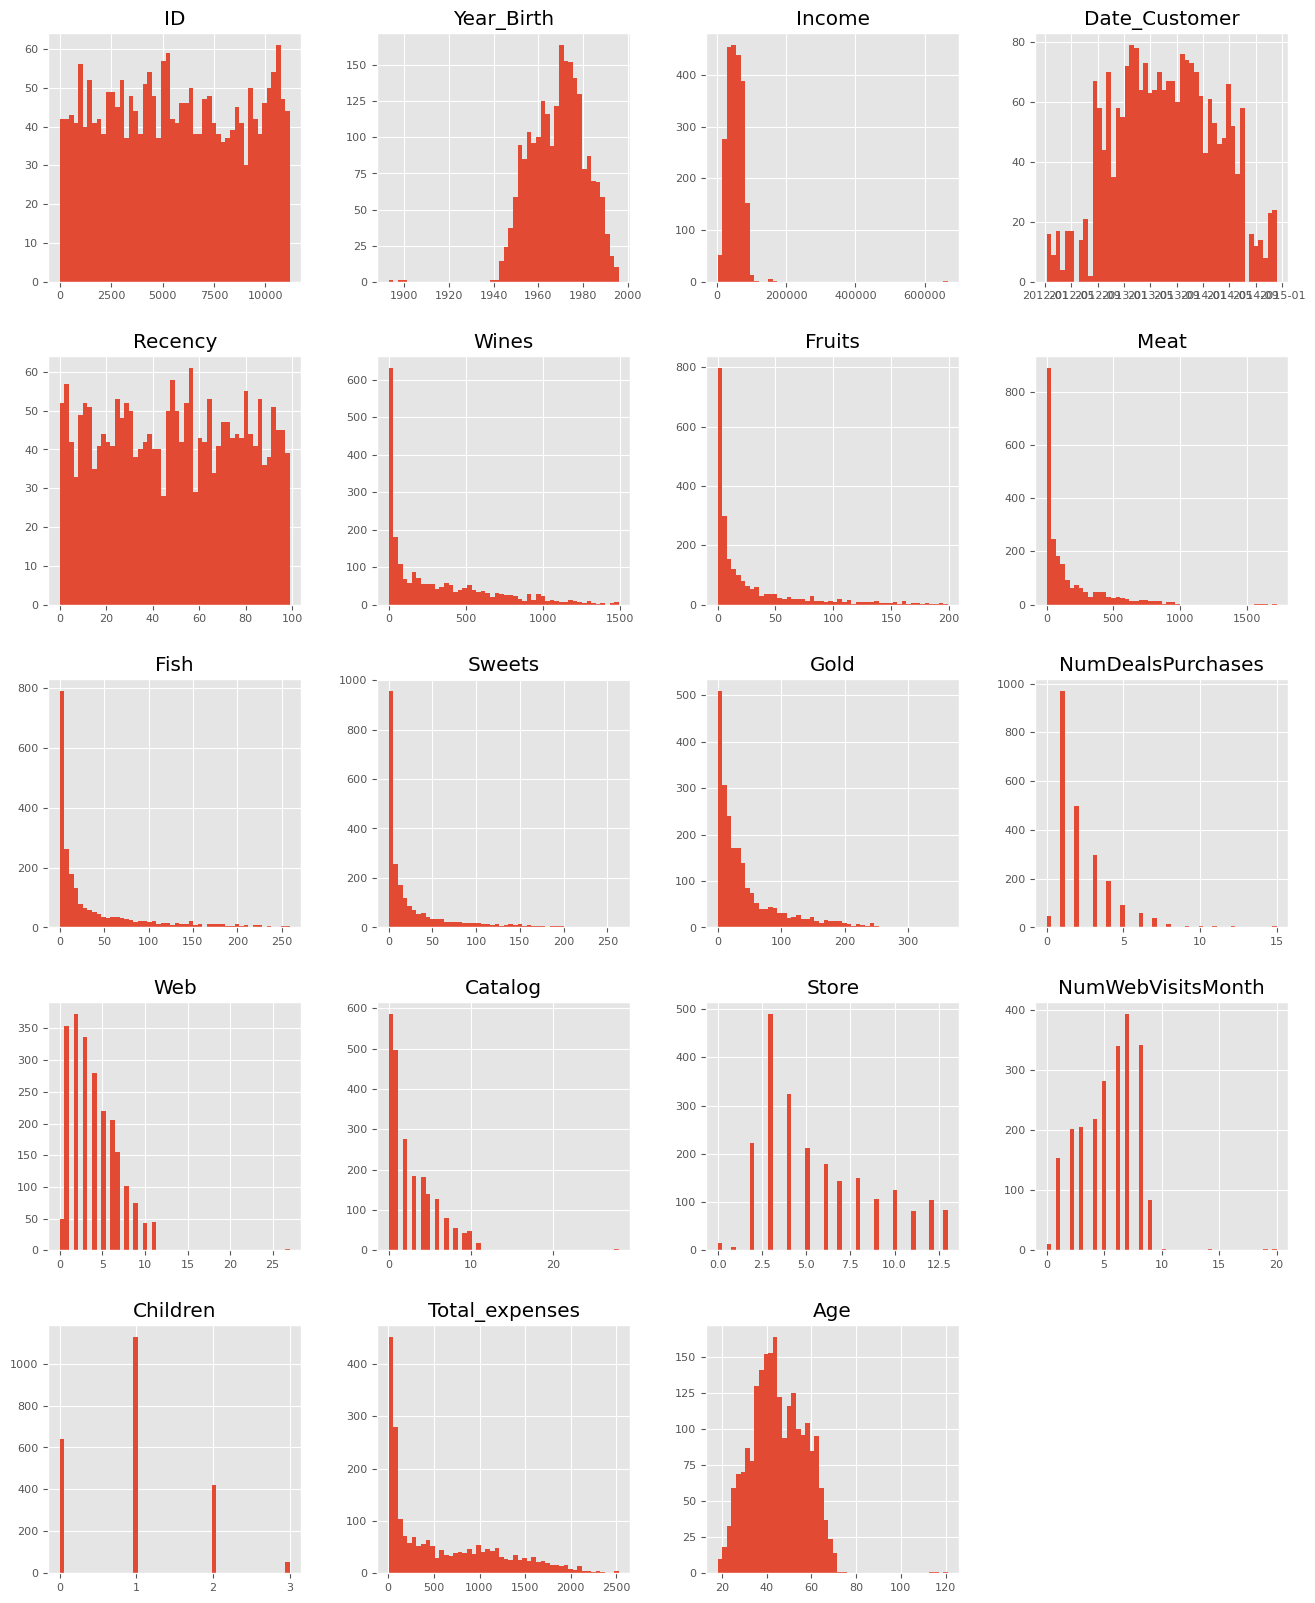

In [26]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

We can see some outliers in the 'Year_Birth' (and therefore 'Age') and 'Income' columns. Others seem normal, although there are people who spent more than average on certain goods.

In [27]:
df['Year_Birth'].value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

We can see that there are customers who were born before 1900, which is strange because the data of all purchases is in the period from 2012 to 2014, let's visualise the age distribution of our data to see the outliers:

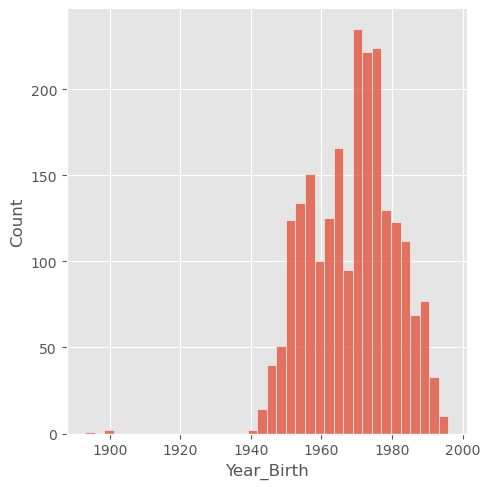

In [28]:
sns.displot(df['Year_Birth'])

We can see that most of our customers were born around 1970. At the same time we can see on the graph that there are a few people who were born long before our core distribution, let's see how many of these rows we have:

In [29]:
df[df['Year_Birth'] < 1930]

,ID,Year_Birth,Education,Marital_Status,Income,Date_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,Children,Total_expenses,Age
192,7829,1900,Postgraduate,Single,36640.0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,1,65,114
239,11004,1893,Postgraduate,Single,60182.0,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,1,22,121
339,1150,1899,Postgraduate,Relationship,83532.0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,1853,115


<Axes: xlabel='Year_Birth'>

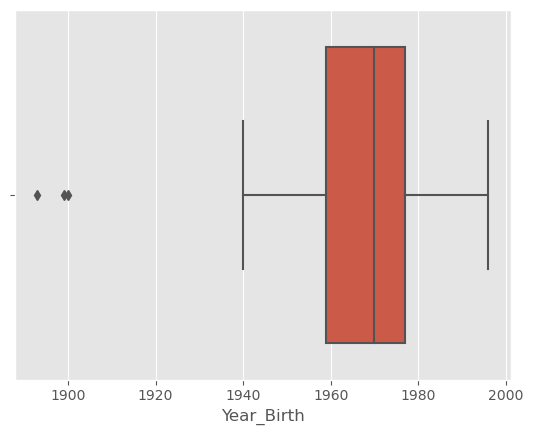

In [30]:
sns.boxplot(x=df['Year_Birth'])

<Axes: ylabel='Marital_Status'>

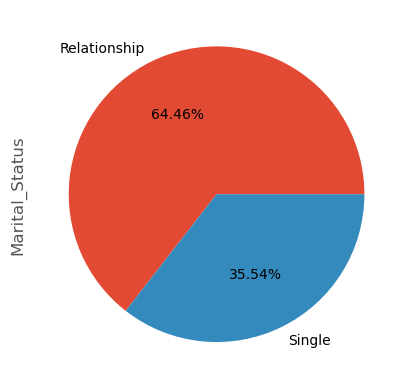

In [31]:
df['Marital_Status'].value_counts().plot.pie(autopct='%.2f%%')

64% of our customers are in a relationship and around 36% of them are single.

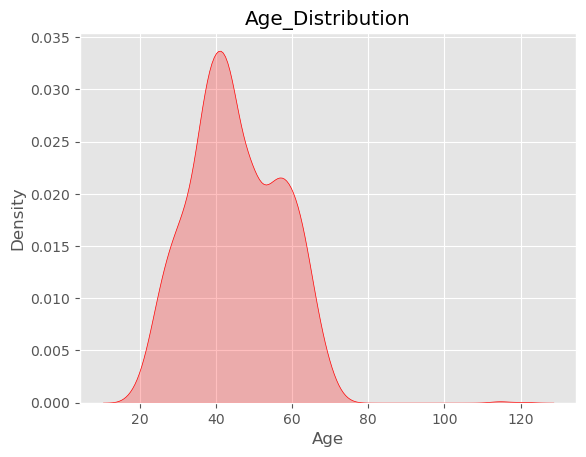

In [32]:
ax = plt.axes()
sns.kdeplot(
    data=df,
    x='Age',
    color='red',
    fill=True,
    ax=ax,
)
ax.set_title('Age_Distribution')
plt.show()

The majority of our customers are aged between 35 and 62.

<Axes: >

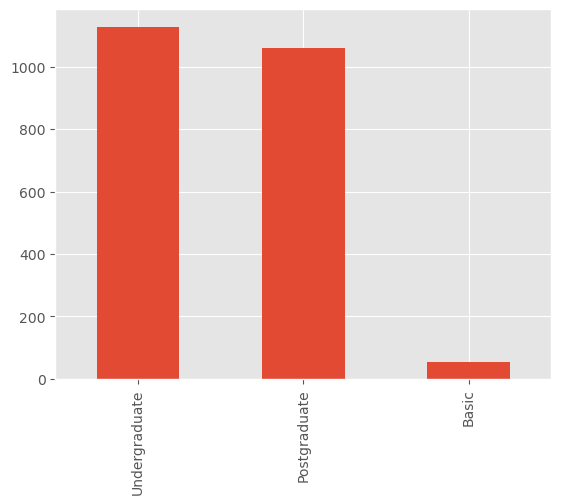

In [33]:
df['Education'].value_counts().plot(kind='bar')

In [34]:
df['Education'].value_counts()

Undergraduate    1127
Postgraduate     1059
Basic              54
Name: Education, dtype: int64

Almost all of our clients have at least a bachelor's degree, although 54 of them have only a high school diploma.

<Axes: xlabel='Income'>

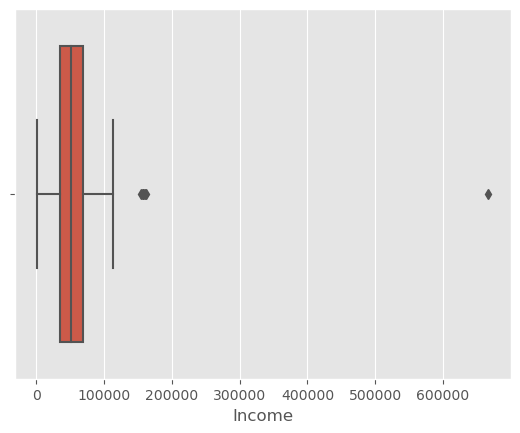

In [35]:
sns.boxplot(x=df['Income'])

In [36]:
df['Income'].describe()


count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [37]:
df[df['Income'] >= 100000].shape[0], df[df['Income'] >= 200000].shape[0] 

(13, 1)

The average income of our customers is around $51000, only 13 people have an income over $10000 and there is only one person who has an income over $200000 which is $666666.

Now let's look at how marital status and age relate to total spending:

In [38]:
fig = px.histogram(df, x='Total_expenses', facet_row = "Marital_Status")
fig.show()

People in relationships spend more

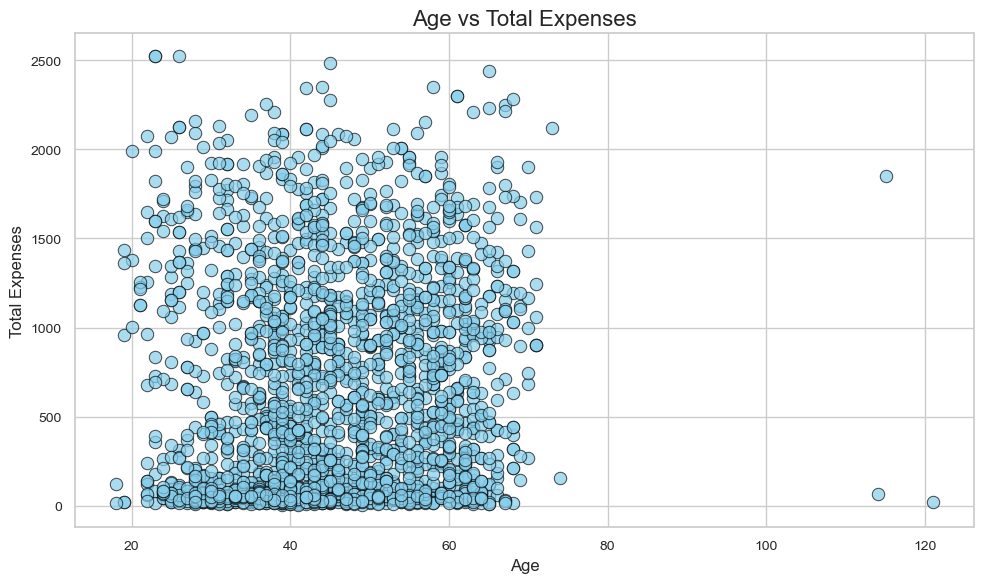

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total_expenses', data=df, alpha=0.7, s=80, color='skyblue', edgecolor='black')
plt.title('Age vs Total Expenses', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Expenses', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Let's answer the question of which was the best month for sales

<Axes: xlabel='Month'>

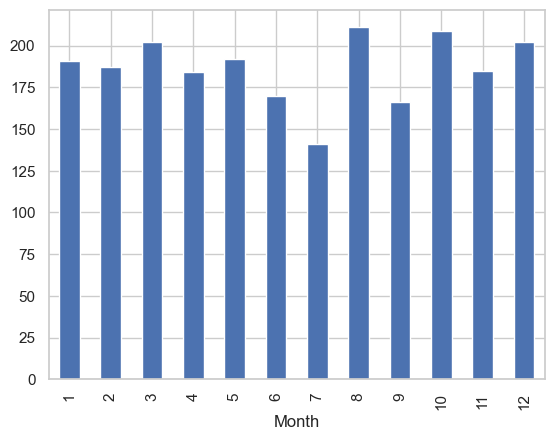

In [40]:
df['Month'] = df['Date_Customer'].dt.month
df.groupby('Month').ID.count().plot(kind="bar")

Best months for sales are August, October, March and December

Now let's visualise the top 10 spenders of each product by age:

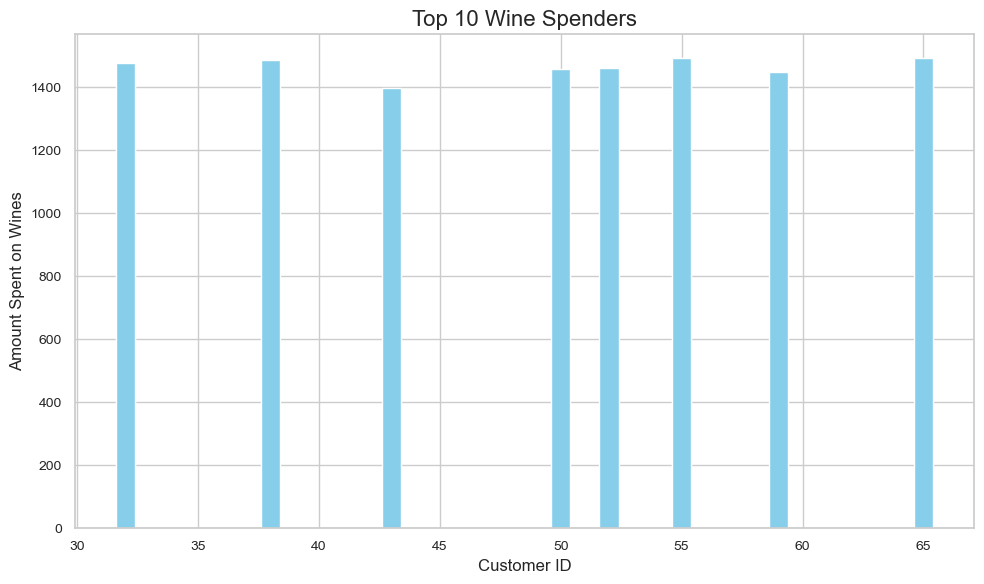

In [41]:
top_spenders_wine = df.nlargest(10, 'Wines')

plt.figure(figsize=(10, 6))
plt.bar(top_spenders_wine['Age'], top_spenders_wine['Wines'], color='skyblue')
plt.title('Top 10 Wine Spenders', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Amount Spent on Wines', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

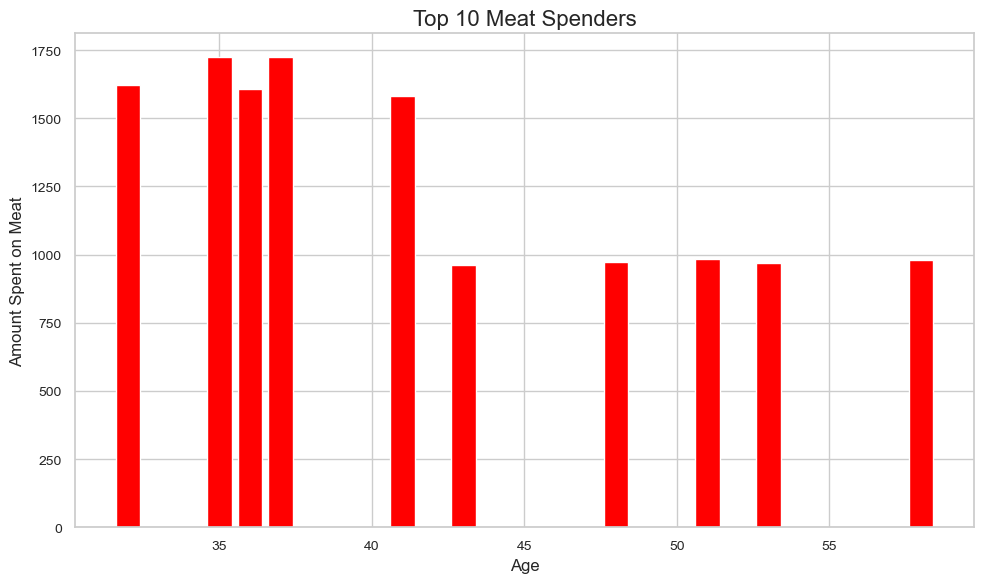

In [42]:
top_spenders_meat = df.nlargest(10, 'Meat')

plt.figure(figsize=(10, 6))
plt.bar(top_spenders_meat['Age'], top_spenders_meat['Meat'], color='red')
plt.title('Top 10 Meat Spenders', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Amount Spent on Meat', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

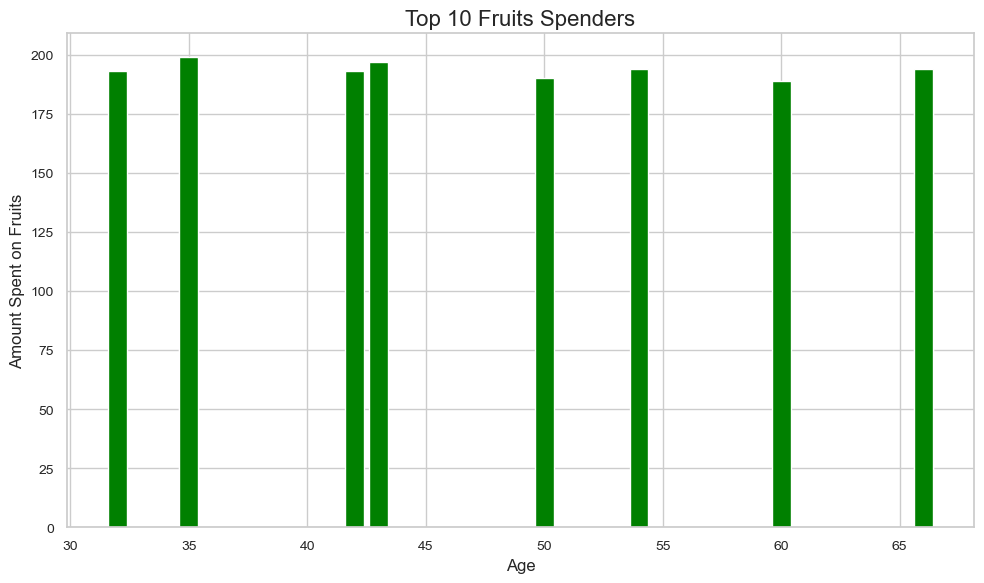

In [43]:
top_spenders_fruits = df.nlargest(10, 'Fruits')

plt.figure(figsize=(10, 6))
plt.bar(top_spenders_fruits['Age'], top_spenders_fruits['Fruits'], color='green')
plt.title('Top 10 Fruits Spenders', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Amount Spent on Fruits', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

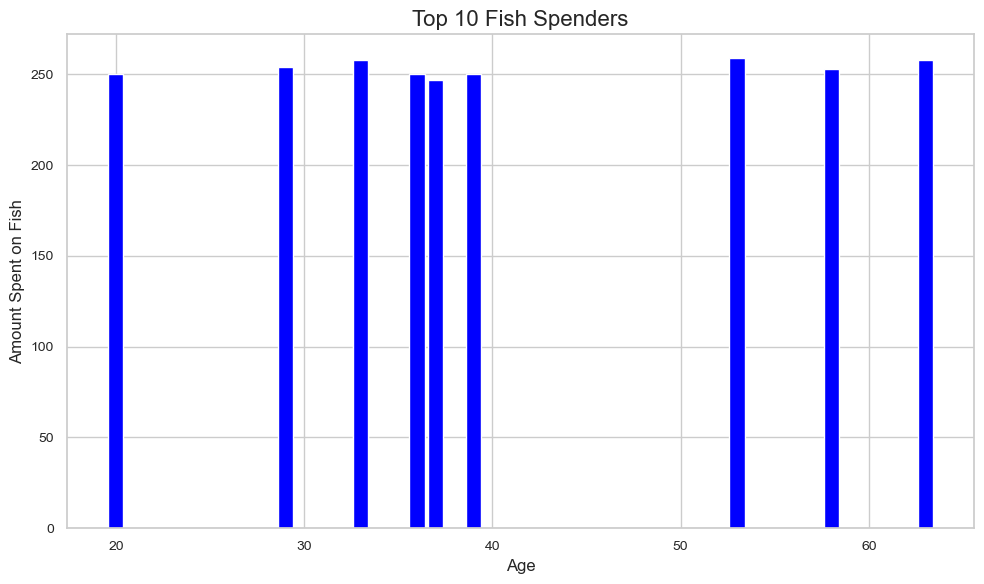

In [44]:
top_spenders_fish = df.nlargest(10, 'Fish')

plt.figure(figsize=(10, 6))
plt.bar(top_spenders_fish['Age'], top_spenders_fish['Fish'], color='blue')
plt.title('Top 10 Fish Spenders', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Amount Spent on Fish', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

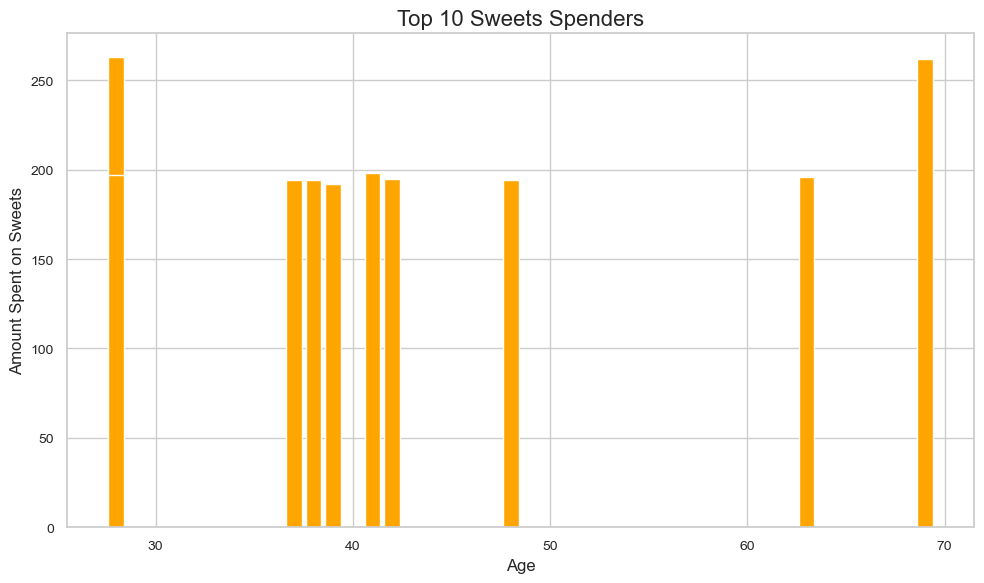

In [45]:
top_spenders_sweets = df.nlargest(10, 'Sweets')

plt.figure(figsize=(10, 6))
plt.bar(top_spenders_sweets['Age'], top_spenders_sweets['Sweets'], color='orange')
plt.title('Top 10 Sweets Spenders', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Amount Spent on Sweets', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

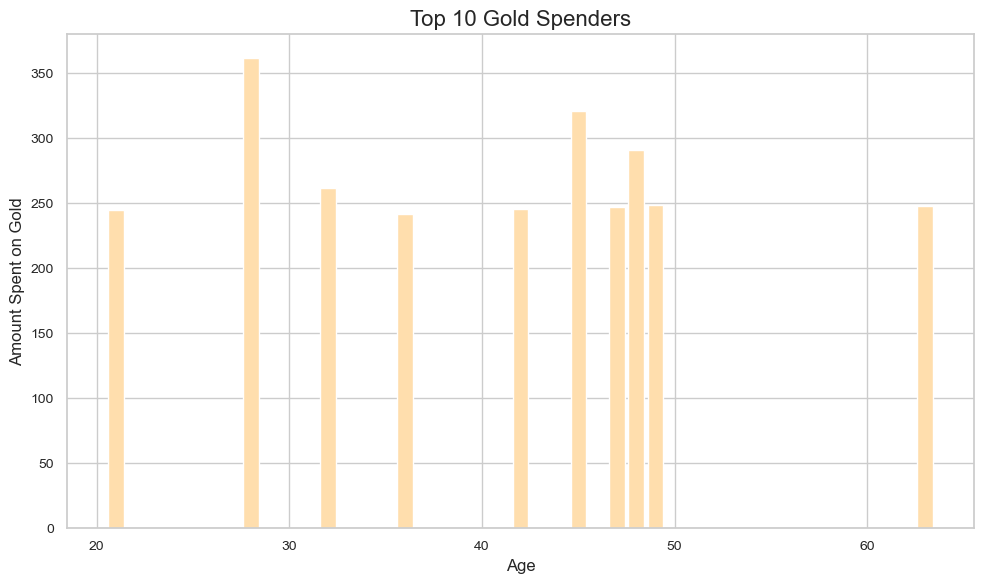

In [46]:
top_spenders_gold = df.nlargest(10, 'Gold')

plt.figure(figsize=(10, 6))
plt.bar(top_spenders_gold['Age'], top_spenders_gold['Gold'], color='navajowhite')
plt.title('Top 10 Gold Spenders', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Amount Spent on Gold', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

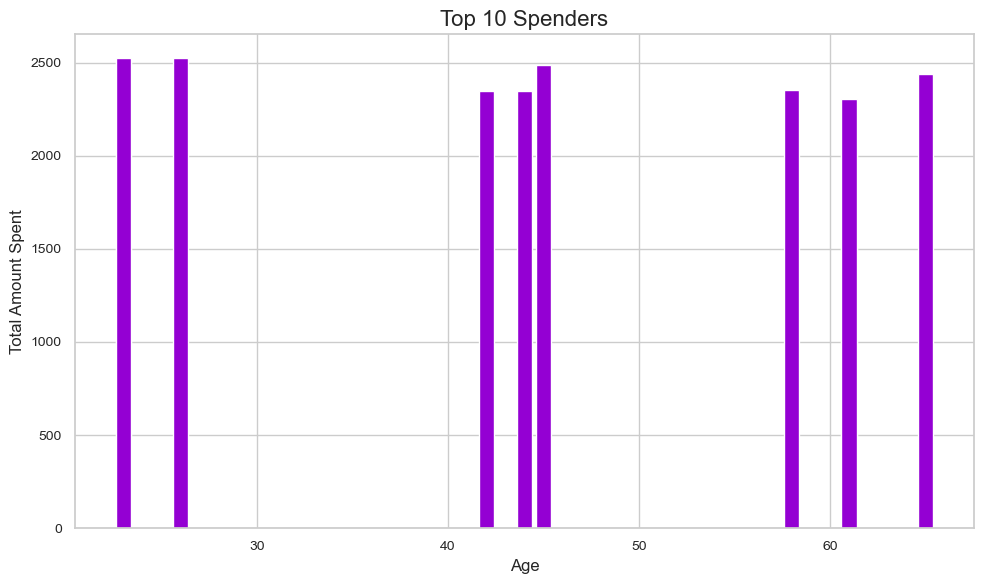

In [47]:
top_spenders_total = df.nlargest(10, 'Total_expenses')

plt.figure(figsize=(10, 6))
plt.bar(top_spenders_total['Age'], top_spenders_total['Total_expenses'], color='darkviolet')
plt.title('Top 10 Spenders', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## The biggest data insights:

* **Relationship Status Breakdown:**

  + 64% in relationships, 36% single

---
* **Age Distribution**:

  + Majority aged between 35 and 62
---
* **Educational Attainment:**

  + Almost all have at least a bachelor's degree
  + 54 individuals hold only a high school diploma
---
* **Income Insights:**

  + Average income approximately $51,000
  + Fewer individuals with incomes above $100,000
  + One person with an income of $666,666
---
* **Spending Habits by Relationship Status:**

  + Those in relationships tend to spend more
---
* **Peak Sales Months:**

  + Best sales months: August, October, March, December

### **Recommendations:**

 * As the majority of customers are in the 35-62 age group, targeted campaigns should address the preferences, aspirations and lifestyle needs of this demographic. In addition, given that a significant proportion of our customer base is in relationships, we should consider tailoring marketing campaigns specifically for couples or families.

 * For higher-income customers, we can introduce exclusive or premium products/services that resonate with their purchasing power and lifestyle aspirations, while focusing primarily on our core customer base of the middle class (according to a 2012 survey, 65% of people in households with family incomes of $50,000 to $99,999 a year consider themselves middle class).

 * We should consider capitalising on peak sales months (August, October, March, December) by optimising marketing efforts and adjusting inventory levels to meet increased demand during these periods.



**Opportunities for future research**

While the current analysis provides valuable insights into certain customer demographics and behaviours, there remains an opportunity to further explore the dataset for deeper understanding and more actionable results. Consideration of more advanced analytics or models could provide additional insights and recommendations that could help the company refine its product offerings and marketing approaches to better target different customer segments.